In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
import pandas as pd
pd.options.display.max_rows = 999

import numpy as np

from matplotlib import pyplot
import seaborn
sns.set(color_codes=True)
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Phân tích và trực quan dữ liệu/data_final.xlsx')

#Format names of columns
df.rename(columns = {'Tên sản phẩm': 'Name',
                     'Giá':'Price',
                     'Loại sản phẩm':'Type',
                     'Số sao trung bình':'Average_Star',
                     'Lượt bán':'Sales',
                     'Số lượt đánh giá':'Reviews',
                     'comment':'Comment',
                     'label':'Label',
                     'words':'Words',
                     'rating':'Rating'}, inplace=True) 

#print 5 samples of data
df.sample(5)

,Unnamed: 0,Unnamed: 0.1,Name,Price,Type,Average_Star,Sales,Reviews,Comment,Label,Words,Rating
3453,7337,7337,"Mũ bảo hiểm A102K nhiều màu sắc, Nón bảo hiểm ...",119999,Bảo hộ giao thông,4.9,1100,455,Okk ậhbdbdhdhdjdbbdjdjsjdbbdvdvdhjdbdbdbbđbdbd...,1,NaN,5
3925,8172,8172,THÙNG 300 CHIẾC KHẨU TRANG CÁ KHÁNG KHUẨN 4D K...,279000,Sức khỏe,4.7,1200,312,"Hàng như hình, sẽ ủng hộ shop nha",1,NaN,5
1121,2071,2071,"Serum Trắng Da, Mờ Nám Tàn Nhang - V9Queen Mỹ ...",150000,Mỹ phẩm,5.0,1700,301,Good,1,NaN,5
4072,8451,8451,Cân Điện Tử Sức Khỏe Hình Chú Heo Xinh Xắn Dàn...,85000,Sức khỏe,4.8,3000,626,Shop bán chất lượng\ngiao nhanh\nđóng gói chắc...,1,NaN,5
2369,5123,5123,Lò nướng 10L Sunhouse SHD4305,519000,Thiết bị điện gia dụng,4.8,1300,581,Xinh xắn nhỏ gọnnnnnnnnnnnnnnnnnnannnnnnnnnnnn...,2,NaN,5


# Kiểm tra kiểu dữ liệu 

In [11]:
df['Name'] = df['Name'].astype('category')
df['Type'] = df['Type'].astype('category')

In [12]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Price,Average_Star,Sales,Reviews,Label,Words,Rating
count,4183.000000,4183.000000,4.183000e+03,4183.000000,4183.000000,4183.000000,4183.000000,0.0,4183.000000
mean,4317.650012,4317.650012,3.511742e+05,4.856538,1914.535023,610.814965,1.233325,NaN,4.801100
std,2621.650975,2621.650975,6.640018e+05,0.076225,748.075208,170.281176,0.538404,NaN,0.710735
min,0.000000,0.000000,1.290000e+04,4.700000,1100.000000,301.000000,0.000000,NaN,1.000000
25%,1992.500000,1992.500000,8.500000e+04,4.800000,1300.000000,493.000000,1.000000,NaN,5.000000
50%,4470.000000,4470.000000,1.150000e+05,4.800000,1700.000000,581.000000,1.000000,NaN,5.000000
75%,6501.500000,6501.500000,2.200000e+05,4.900000,2300.000000,741.000000,2.000000,NaN,5.000000
max,8570.000000,8570.000000,2.499000e+06,5.000000,3600.000000,873.000000,2.000000,NaN,5.000000


In [13]:
df.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
Name            category
Price              int64
Type            category
Average_Star     float64
Sales              int64
Reviews            int64
Comment           object
Label              int64
Words            float64
Rating             int64
dtype: object

# Kiểm tra có hàng trùng nhau


In [6]:
print('shape of data: ', df.shape)
print('check duplicates: ', df.drop_duplicates().shape)

shape of data:  (4183, 12)
check duplicates:  (4183, 12)


vậy nên: bộ dữ liệu không có dữ liệu trùng nhau

In [7]:
print('Có {} mặt hàng được đánh giá trong bộ dữ liệu.' .format(df['Name'].drop_duplicates().shape[0]))

Có 651 mặt hàng được đánh giá trong bộ dữ liệu.


In [8]:
print('Có {} loại hàng được đánh giá trong bộ dữ liệu.' .format(df['Type'].drop_duplicates().shape[0]))

Có 8 loại hàng được đánh giá trong bộ dữ liệu.


In [19]:
product_name_counts = df['Name'].value_counts().to_frame()
product_name_counts.rename(columns={'Name':'value_counts'},inplace = True)
product_name_counts.index.name = 'product_name'
product_name_counts

,value_counts
product_name,
Áo cổ lọ tay dài thời trang thu đông nhiều màu trơn tùy chọn cho nữ,484
Lược Chải Lông Chuyên Nghiệp Tiện Dụng Cho Thú Cưng,391
[Mã FMCGMALL giảm 8% đơn từ 250K] WHISKAS® Thức ăn cho mèo lớn dạng hạt vị cá biển 3kg (1 túi),361
Bộ trang điểm PINKFLASH phiên bản đặc biệt với phấn mắt + son lì mềm môi + phấn má hồng + phấn nền kiểm soát dầu,287
Đồng hồ thể thao nam nữ Unisex cao cấp chính hãng SPORT WATCH siêu hot giá rẻ,253
"Mũ bảo hiểm 3/4 đầu TẶNG KÈM MÁI TRE Classic viền nâu, lót màu cao cấp - tặng kèm lưỡi trai",240
Cân Điện Tử Sức Khỏe Hình Chú Heo Xinh Xắn Dành Cho Gia Đình - Tiện Lợi - Chính Xác ( tặng thước dây và pin),236
Bộ thun thời trang thể thao nam nhiều mẫu,233
"Chuột Máy Tính G5 6D LED 7 Màu Cực Đẹp, DPI Khủng 3200, Chơi Game Làm Việc Văn Phòng Cực Tiện Dụng - Bảo Hành 1T",231


In [20]:
product_type_counts = df['Type'].value_counts().to_frame()
product_type_counts.rename(columns={'Type':'value_counts'},inplace = True)
product_type_counts.index.name = 'product_type'
product_type_counts

,value_counts
product_type,
Thú cưng,752
Thời trang,717
Thiết bị điện gia dụng,637
Bảo hộ giao thông,460
Mỹ phẩm,417
Sức khỏe,416
Đồng hồ,404
Thiết bị điện tử,380


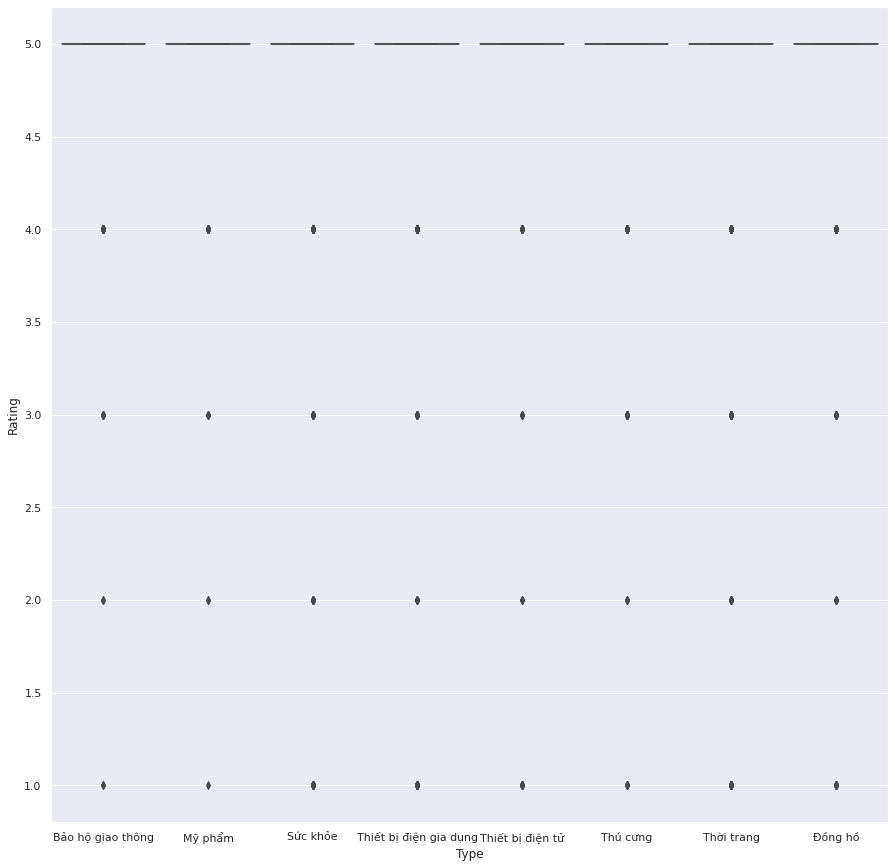

In [32]:
a4_dims = (15,15)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(x='Type', y='Rating', data=df, ax = ax)

# Phân tích tương quan giữa các biến

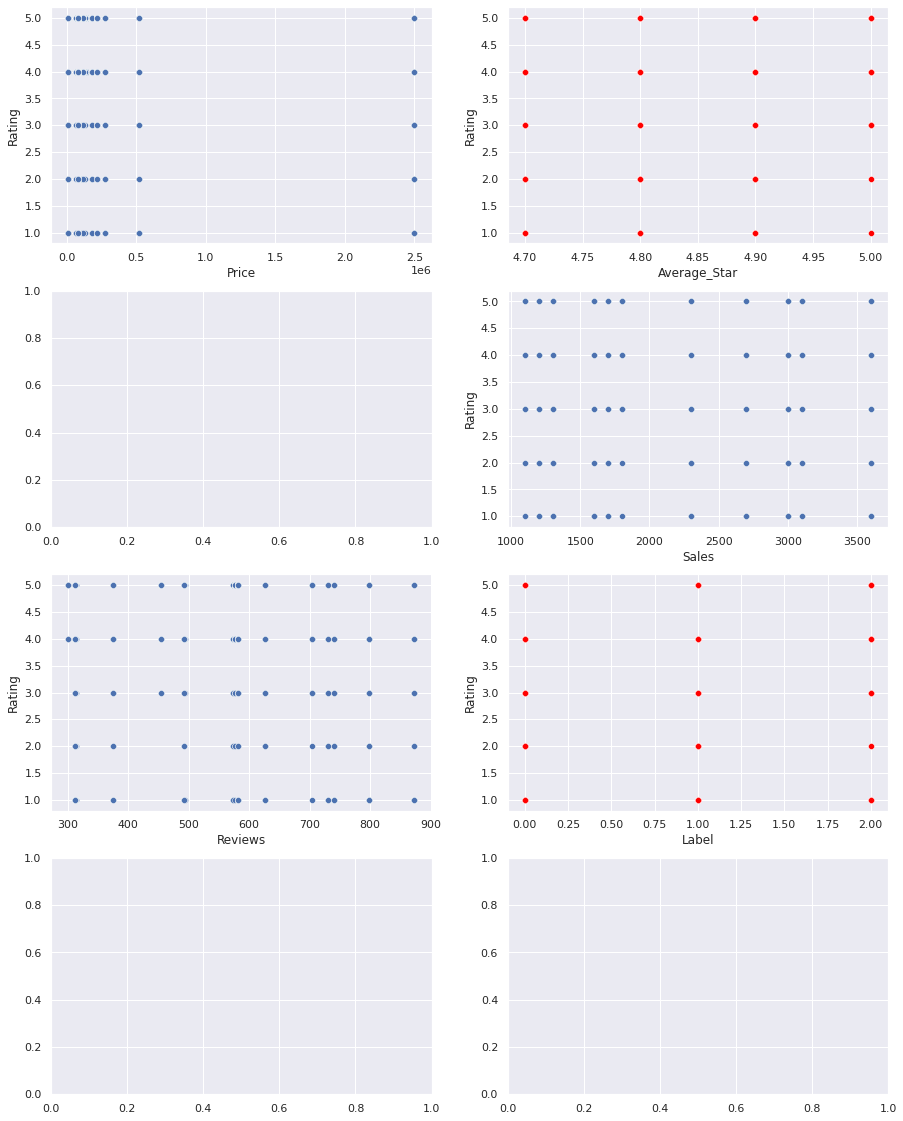

In [9]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,20))

sns.scatterplot(x = df['Price'], y=df['Rating'], ax=axes[0,0])
sns.scatterplot(x = df['Average_Star'], y=df['Rating'], ax=axes[0,1], color='red')
sns.scatterplot(x = df['Sales'], y=df['Rating'], ax=axes[1,1])
sns.scatterplot(x = df['Reviews'], y=df['Rating'], ax=axes[2,0])
sns.scatterplot(x = df['Label'], y=df['Rating'], ax=axes[2,1], color='red')

# Check missing values

In [10]:
df.isna().sum(axis = 0)

Unnamed: 0         0
Unnamed: 0.1       0
Name               0
Price              0
Type               0
Average_Star       0
Sales              0
Reviews            0
Comment            0
Label              0
Words           4183
Rating             0
dtype: int64